In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
credit_df= pd.read_csv(r"D:\Fall 2020 courses\CSC5825 machine learning\project\creditcard.csv")
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#statistics of data
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Checking for null values
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Printing all the column values
credit_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# 1 - fraud, 0 - nonfraudulent
set(credit_df['Class'])

{0, 1}

In [7]:
# knowing percentage of fraudulent and nonfraudulent data
classes=credit_df['Class'].value_counts()
normal_share=classes[0]/credit_df['Class'].count()*100
fraud_share=classes[1]/credit_df['Class'].count()*100

print('Percentage of non-fraud in given dataset : ', normal_share)
print('Percentage of fraud in given dataset : ', fraud_share)
print('Number of fraud in dataset : ',classes[1])
print('Number of non-fraud in dataset : ',classes[0])

Percentage of non-fraud in given dataset :  99.82725143693798
Percentage of fraud in given dataset :  0.1727485630620034
Number of fraud in dataset :  492
Number of non-fraud in dataset :  284315


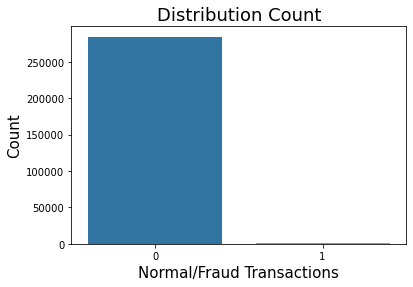

In [8]:
# visualizing nonfraudulent and Fraudulent transactions

plt.figure(figsize=(6,4))
sns.countplot(credit_df['Class'])
plt.title("Distribution Count", fontsize=18)
plt.xlabel("Normal/Fraud Transactions", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Distribution of Amount')

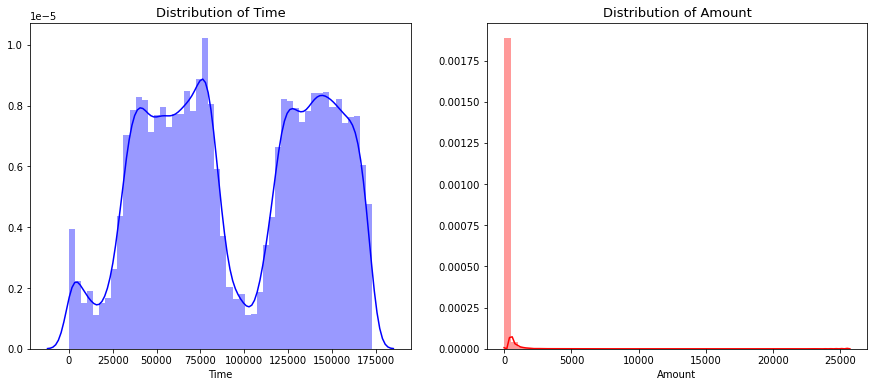

In [9]:
# visualizing distribution of transaction time and transaction amount
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(credit_df['Time'], ax=ax1, color='b')
ax2 = sns.distplot(credit_df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

In [10]:
# Scaling columns 'Amount' and 'Time' as it's not scaled 
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

credit_df['scaled_amount'] = rob_scaler.fit_transform(credit_df['Amount'].values.reshape(-1,1))
credit_df['scaled_time'] = rob_scaler.fit_transform(credit_df['Time'].values.reshape(-1,1))

credit_df.drop(['Time','Amount'], axis=1, inplace=True)

In [11]:
scaled_amount = credit_df['scaled_amount']
scaled_time = credit_df['scaled_time']

credit_df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_df.insert(0, 'scaled_amount', scaled_amount)
credit_df.insert(1, 'scaled_time', scaled_time)

credit_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
# The dataset is highly skewed,to avoid overfitting of data, random under sampling is performed to have a balanced dataset

credit_df = credit_df.sample(frac=1)
fraud_df = credit_df.loc[credit_df['Class'] == 1]
non_fraud_df = credit_df.loc[credit_df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
252030,0.300706,0.833280,1.960665,0.067089,-1.644488,1.426861,0.326549,-1.154670,0.641114,-0.387210,...,-0.277557,0.062698,0.295972,-0.023830,-0.025896,0.420498,-0.490746,-0.026035,-0.057512,0
73784,-0.293440,-0.345552,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,...,0.017500,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1
283569,-0.296793,1.022169,2.158602,0.750699,-3.464304,0.547413,1.664424,-1.236616,0.874736,-0.495646,...,-0.044505,-0.104484,-0.044555,-0.138957,-0.059689,0.525239,0.718488,-0.076391,-0.017809,0
243699,-0.293440,0.791175,-4.320609,3.199939,-5.799736,6.502330,0.378479,-1.948246,-2.167860,-0.728207,...,-0.263686,0.476660,0.434278,-0.136940,-0.620072,0.642531,0.280717,-2.649107,0.533641,1
93486,-0.307413,-0.237890,1.079524,0.872988,-0.303850,2.755369,0.301688,-0.350284,-0.042848,0.246625,...,-0.252115,-0.023255,-0.158601,-0.038806,-0.060327,0.358339,0.076984,0.018936,0.060574,1


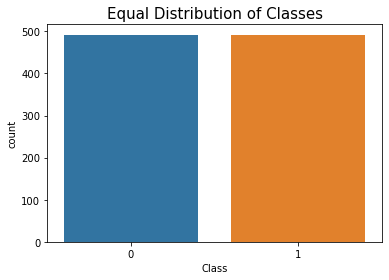

In [13]:
sns.countplot('Class', data=new_df)
plt.title('Equal Distribution of Classes', fontsize=15)
plt.show()

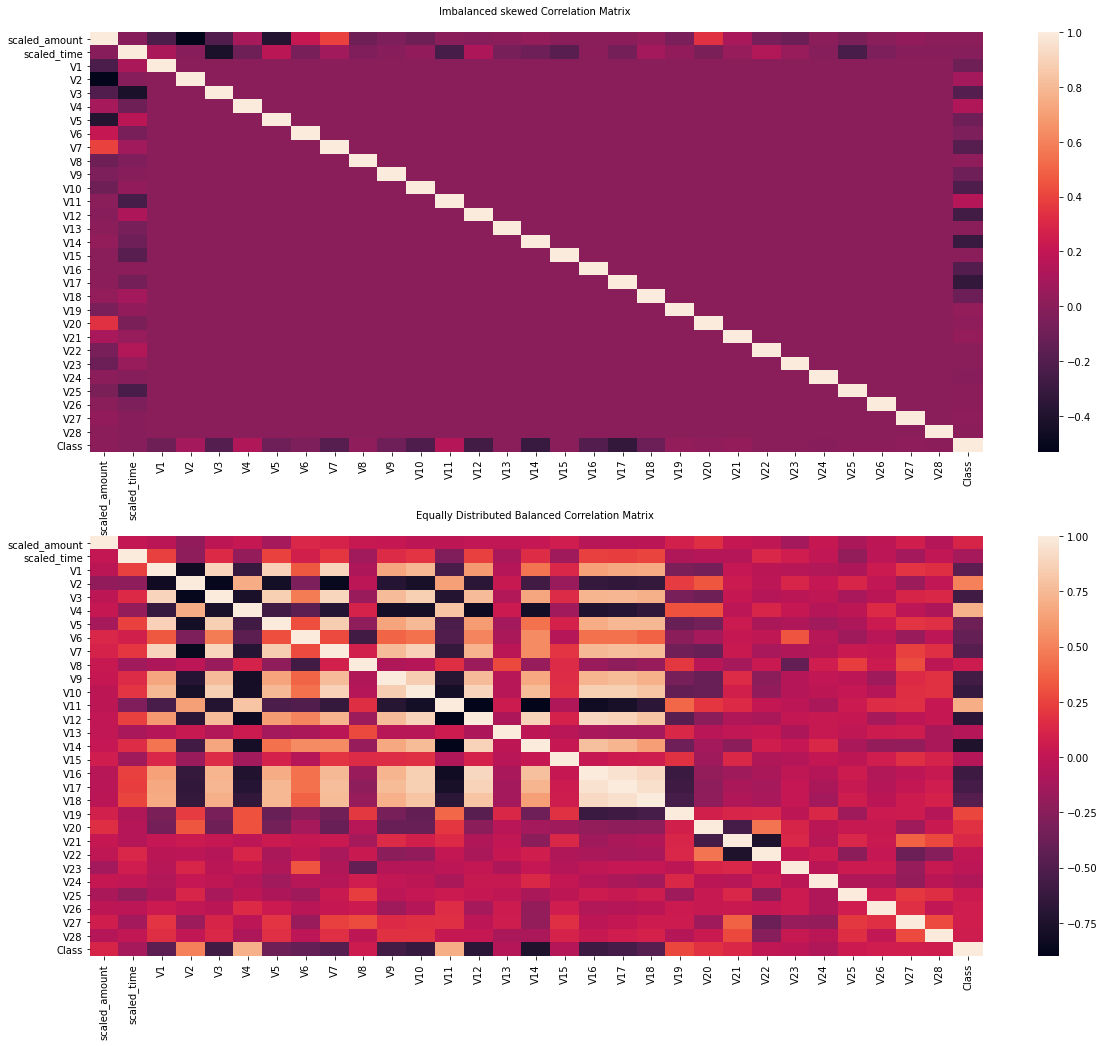

In [14]:
# Visualizing Correlation matrix on imbalanced and balanced datasets

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,17))

corr = credit_df.corr()
sns.heatmap(corr, annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced skewed Correlation Matrix \n", fontsize=10)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, annot_kws={'size':10}, ax=ax2)
ax2.set_title('Equally Distributed Balanced Correlation Matrix \n', fontsize=10)
plt.show()

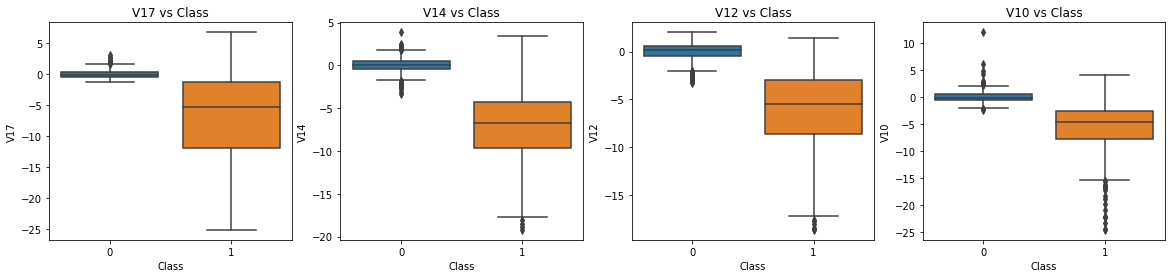

In [15]:
#from above plot,it can be seen that v17,v14,v12,v10 are negatively correlated

f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V17", data=new_df,  ax=axes[0])
axes[0].set_title('V17 vs Class')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class')


sns.boxplot(x="Class", y="V12", data=new_df,  ax=axes[2])
axes[2].set_title('V12 vs Class')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class')

plt.show()

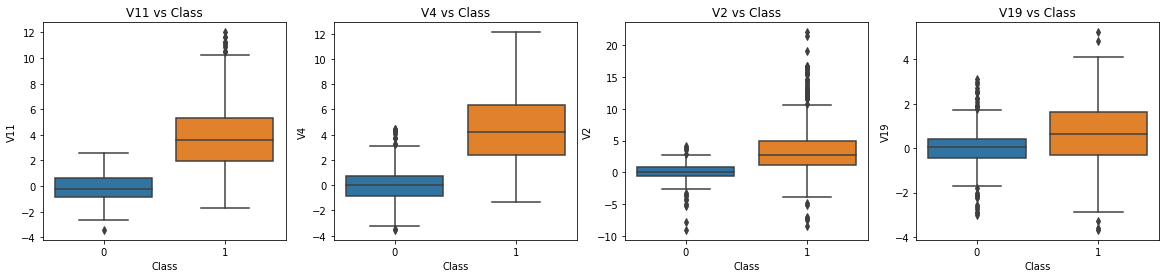

In [16]:
#from Correlation plot,it can be seen that v2,v4,v11,v19 are negatively correlated


f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V11", data=new_df,  ax=axes[0])
axes[0].set_title('V11 vs Class')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title('V4 vs Class')


sns.boxplot(x="Class", y="V2", data=new_df,  ax=axes[2])
axes[2].set_title('V2 vs Class')


sns.boxplot(x="Class", y="V19", data=new_df,  ax=axes[3])
axes[3].set_title('V19 vs Class')

plt.show()

In [17]:
# Removing outliers that are highly negatively correlated with labels.

# v14
fraud_v14 = new_df['V14'].loc[new_df['Class'] == 1].values
iqr25, iqr75 = np.percentile(fraud_v14, 25), np.percentile(fraud_v14, 75)
iqr_v14 = iqr75 - iqr25
cut_off_v14 = iqr_v14 * 1.5
lower_v14, upper_v14 = iqr25 - cut_off_v14, iqr75 + cut_off_v14

outliers = [x for x in fraud_v14 if x < lower_v14 or x > upper_v14]
print('Outliers of v14 for Fraud Cases: {}'.format(len(outliers)))
print('outliers of v14: {}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V14'] > upper_v14) | (new_df['V14'] < lower_v14)].index)
print('\n')

# v12 
fraud_v12 = new_df['V12'].loc[new_df['Class'] == 1].values
iqr25, iqr75 = np.percentile(fraud_v12, 25), np.percentile(fraud_v12, 75)
iqr_v12 = iqr75 - iqr25
cut_off_v12 = iqr_v12 * 1.5
lower_v12, upper_v12 = iqr25 - cut_off_v12, iqr75 + cut_off_v12
outliers = [x for x in fraud_v12 if x < lower_v12 or x > upper_v12]
print('Outliers of v12 for Fraud Cases: {}'.format(len(outliers)))
print('outliers of v12: {}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V12'] > upper_v12) | (new_df['V12'] < lower_v12)].index)
print('\n')


# Removing outliers V10 Feature
fraud_v10 = new_df['V10'].loc[new_df['Class'] == 1].values
iqr25, iqr75 = np.percentile(fraud_v10, 25), np.percentile(fraud_v10, 75)
iqr_v10 = iqr75 - iqr25
cut_off_v10 = iqr_v10 * 1.5
lower_v10, upper_v10 = iqr25 - cut_off_v10, iqr75 + cut_off_v10
outliers = [x for x in fraud_v10 if x < lower_v10 or x > upper_v10]
print('Outliers of v10 for Fraud Cases: {}'.format(len(outliers)))
print('outliers of v10: {}'.format(outliers))
new_df = new_df.drop(new_df[(new_df['V10'] > upper_v10) | (new_df['V10'] < lower_v10)].index)


Outliers of v14 for Fraud Cases: 4
outliers of v14: [-18.8220867423816, -18.049997689859396, -18.4937733551053, -19.2143254902614]


Outliers of v12 for Fraud Cases: 4
outliers of v12: [-18.553697009645802, -18.683714633344298, -18.047596570821604, -18.4311310279993]


Outliers of v10 for Fraud Cases: 27
outliers of v10: [-18.2711681738888, -22.1870885620007, -16.7460441053944, -15.124162814494698, -16.6496281595399, -14.9246547735487, -15.2318333653018, -22.1870885620007, -23.2282548357516, -19.836148851696, -18.9132433348732, -16.3035376590131, -14.9246547735487, -15.346098846877501, -15.563791338730098, -15.2399619587112, -15.2399619587112, -24.5882624372475, -15.563791338730098, -16.2556117491401, -20.949191554361104, -17.141513641289198, -22.1870885620007, -24.403184969972802, -16.6011969664137, -15.1237521803455, -22.1870885620007]


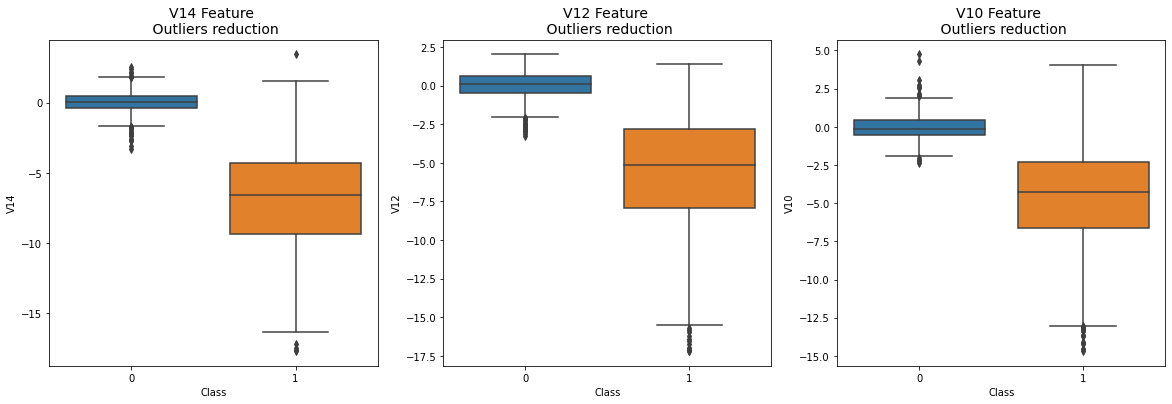

In [18]:
# features v14,v12,v10 after outliers removal
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1)
ax1.set_title("V14 Feature \n Outliers reduction", fontsize=14)


# 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2)
ax2.set_title("V12 Feature \n Outliers reduction", fontsize=14)

# V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3)
ax3.set_title("V10 Feature \n Outliers reduction", fontsize=14)

plt.show()

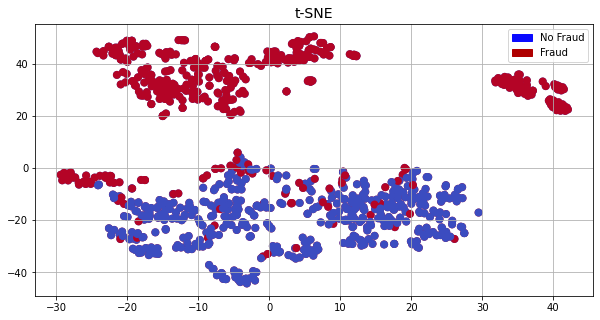

In [19]:
# Performing dimentionality reduction and viewing clusters woth T-SNE

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()

f, (ax1) = plt.subplots(figsize=(10,5))
blue = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red = mpatches.Patch(color='#AF0000', label='Fraud')

#scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue, red])



In [20]:
# Splitting dataset to train(70)-validation(10)-test(20)

train, validate, test = np.split(new_df.sample(frac=1,random_state=42), [int(.7*len(new_df)), int(.8*len(new_df))])
X_train = train.drop('Class', axis=1)
y_train = train['Class']
X_validate = validate.drop('Class', axis=1)
y_validate = validate['Class']
X_test = test.drop('Class', axis=1)
y_test = test['Class']

In [21]:
# converting the values as array
X_train = X_train.values
X_test = X_test.values
X_validate = X_validate.values
y_validate = y_validate.values
y_train = y_train.values
y_test = y_test.values

In [22]:
# Implementing the Supervised and Unsupervised models
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KMeans": KMeans(n_clusters=2, random_state=42)
}

In [23]:
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_val_pred = classifier.predict(X_validate)

    #   f1_score, accuracy_score
    accuracy = accuracy_score(y_validate, y_val_pred)
    f1 = f1_score(y_validate, y_val_pred)
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy of", round(accuracy*100, 2), "%")
    print("Classifiers: ", classifier.__class__.__name__, "Has a f1-score of", round(f1*100, 2), "%")
    print('\n')

Classifiers:  LogisticRegression Has a accuracy of 95.74 %
Classifiers:  LogisticRegression Has a f1-score of 95.56 %


Classifiers:  KNeighborsClassifier Has a accuracy of 95.74 %
Classifiers:  KNeighborsClassifier Has a f1-score of 95.35 %


Classifiers:  SVC Has a accuracy of 96.81 %
Classifiers:  SVC Has a f1-score of 96.55 %


Classifiers:  DecisionTreeClassifier Has a accuracy of 87.23 %
Classifiers:  DecisionTreeClassifier Has a f1-score of 86.96 %


Classifiers:  KMeans Has a accuracy of 71.28 %
Classifiers:  KMeans Has a f1-score of 57.14 %




In [24]:
# Implementing Nearmiss algorithm for Undersampling the majority instances 
X_nearmiss, y_nearmiss = NearMiss().fit_sample(X_train, y_train.ravel())

for key, classifier in classifiers.items():
    classifier.fit(X_nearmiss, y_nearmiss)
    y_val_pred = classifier.predict(X_validate)

    #   f1_score, accuracy_score
    accuracy = accuracy_score(y_validate, y_val_pred)
    f1 = f1_score(y_validate, y_val_pred)
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy of", round(accuracy*100, 2), "% accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a f1-score of", round(f1*100, 2), "% accuracy score")
    print('\n')

Classifiers:  LogisticRegression Has a accuracy of 96.81 % accuracy score
Classifiers:  LogisticRegression Has a f1-score of 96.7 % accuracy score


Classifiers:  KNeighborsClassifier Has a accuracy of 95.74 % accuracy score
Classifiers:  KNeighborsClassifier Has a f1-score of 95.35 % accuracy score


Classifiers:  SVC Has a accuracy of 96.81 % accuracy score
Classifiers:  SVC Has a f1-score of 96.55 % accuracy score


Classifiers:  DecisionTreeClassifier Has a accuracy of 89.36 % accuracy score
Classifiers:  DecisionTreeClassifier Has a f1-score of 89.13 % accuracy score


Classifiers:  KMeans Has a accuracy of 28.72 % accuracy score
Classifiers:  KMeans Has a f1-score of 44.63 % accuracy score




In [25]:
# Implementing SMOTE algorithm for Oversampling the majority instances 


X_smote, y_smote = SMOTE(sampling_strategy='minority').fit_sample(X_train, y_train.ravel())

for key, classifier in classifiers.items():
    classifier.fit(X_smote, y_smote)
    y_val_pred = classifier.predict(X_validate)
    
    #   f1_score, accuracy_score
    accuracy = accuracy_score(y_validate, y_val_pred)
    f1 = f1_score(y_validate, y_val_pred)
    print("Classifiers: ", classifier.__class__.__name__, "Has a accuracy of", round(accuracy*100, 2), "% accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a f1-score of", round(f1*100, 2), "% accuracy score")
    print('\n')

Classifiers:  LogisticRegression Has a accuracy of 95.74 % accuracy score
Classifiers:  LogisticRegression Has a f1-score of 95.56 % accuracy score


Classifiers:  KNeighborsClassifier Has a accuracy of 95.74 % accuracy score
Classifiers:  KNeighborsClassifier Has a f1-score of 95.35 % accuracy score


Classifiers:  SVC Has a accuracy of 96.81 % accuracy score
Classifiers:  SVC Has a f1-score of 96.55 % accuracy score


Classifiers:  DecisionTreeClassifier Has a accuracy of 88.3 % accuracy score
Classifiers:  DecisionTreeClassifier Has a f1-score of 87.91 % accuracy score


Classifiers:  KMeans Has a accuracy of 71.28 % accuracy score
Classifiers:  KMeans Has a f1-score of 57.14 % accuracy score




In [26]:
# calculating ROC_AUC_SCORE

log_reg  = LogisticRegression()
k_nearest =  KNeighborsClassifier()
svc = SVC()
decison_tree =  DecisionTreeClassifier()
k_means = KMeans(n_clusters=2, random_state=42)

In [27]:
log_reg_pred = log_reg.fit(X_train, y_train).predict(X_validate)
knears_pred = k_nearest.fit(X_train, y_train).predict(X_validate)
svc_pred = svc.fit(X_train, y_train).predict(X_validate)
tree_pred = decison_tree.fit(X_train, y_train).predict(X_validate)
k_means_pred = k_means.fit(X_train, y_train).predict(X_validate)

In [28]:
print('Logistic Regression: ', roc_auc_score(y_validate, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_validate, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_validate, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_validate, tree_pred))
print('K means Classifier: ', roc_auc_score(y_validate, k_means_pred))

Logistic Regression:  0.9573696145124716
KNears Neighbors:  0.9555555555555555
Support Vector Classifier:  0.9666666666666667
Decision Tree Classifier:  0.9045351473922901
K means Classifier:  0.7


In [29]:
# Undersampling Logistic regression, calculating average precision score
undersample_y_score = log_reg.fit(X_nearmiss, y_nearmiss).predict(X_validate)

In [30]:
undersample_average_precision = average_precision_score(y_validate, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.95


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.95')

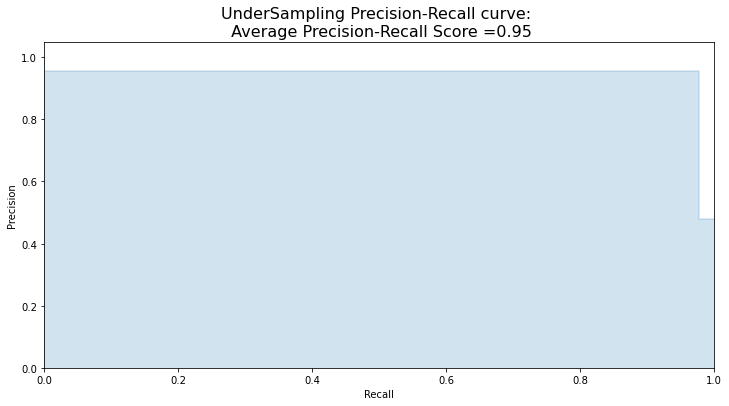

In [31]:
# plotting precision recall curve 
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(y_validate, undersample_y_score)
plt.step(recall, precision, alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [32]:
# Oversampling Logistic regression, calculating average precision score
labels = ['No Fraud', 'Fraud']
smote_prediction = log_reg.fit(X_smote, y_smote).predict(X_validate)
print(classification_report(y_validate, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.96      0.96      0.96        49
       Fraud       0.96      0.96      0.96        45

    accuracy                           0.96        94
   macro avg       0.96      0.96      0.96        94
weighted avg       0.96      0.96      0.96        94



In [33]:
average_precision = average_precision_score(y_validate, smote_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.93


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.93')

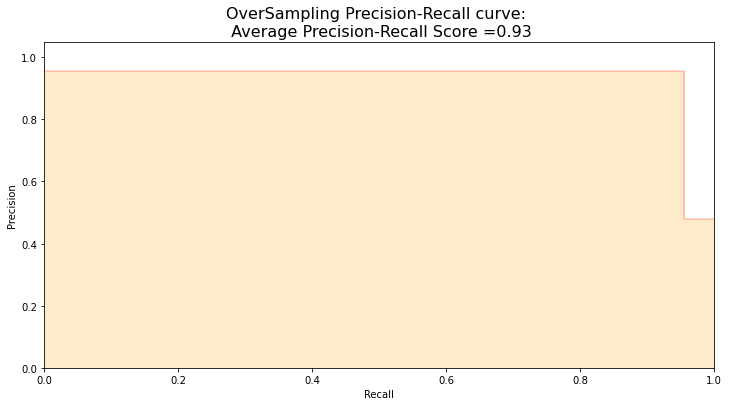

In [34]:
# plotting precision recall curve 
fig = plt.figure(figsize=(12,6))
precision, recall, _ = precision_recall_curve(y_validate, smote_prediction)
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

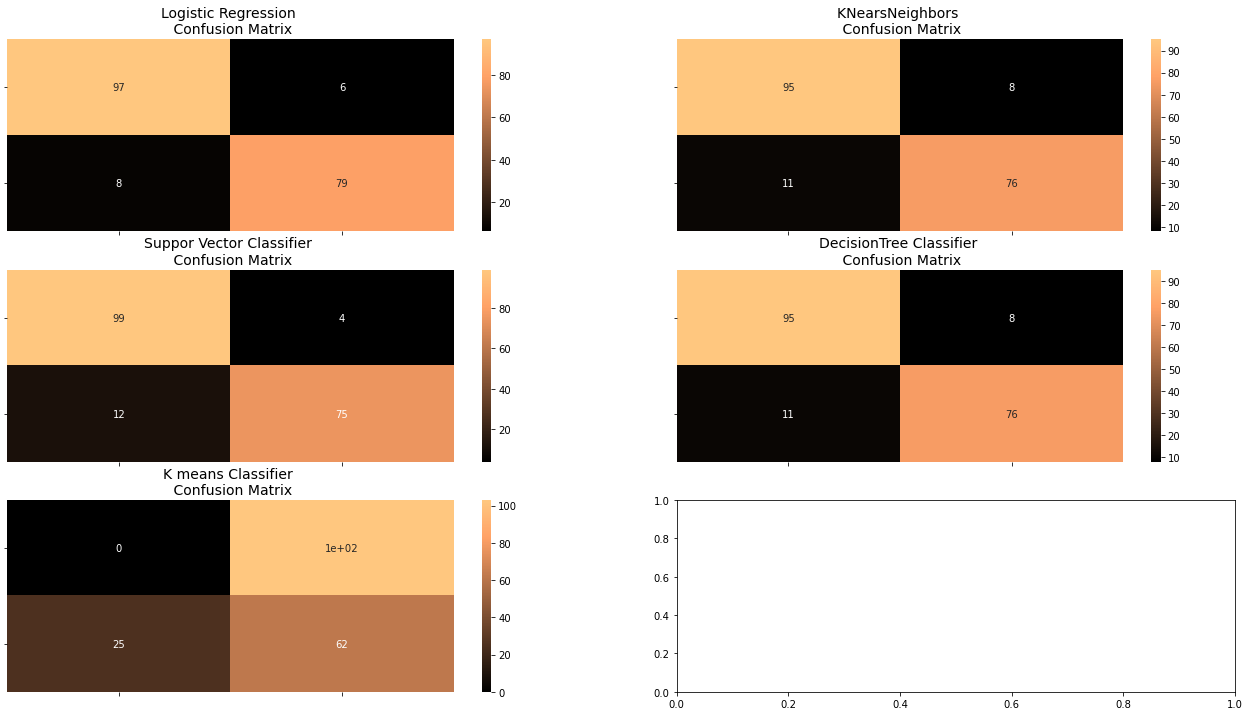

In [35]:
from sklearn.metrics import confusion_matrix

# fitting Logistic Regression with SMOTE algorithm
y_pred_log_reg = log_reg.fit(X_smote, y_smote).predict(X_test)

# fitting other models with NearMiss(underSampling) algorithm
y_pred_knear = decison_tree.fit(X_nearmiss, y_nearmiss).predict(X_test)
y_pred_svc = svc_pred = svc.fit(X_nearmiss, y_nearmiss).predict(X_test)
y_pred_tree = decison_tree.fit(X_nearmiss, y_nearmiss).predict(X_test)
y_pred_kmeans = k_means.fit(X_nearmiss, y_nearmiss).predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
kmeans_cf = confusion_matrix(y_test, y_pred_kmeans)
fig, ax = plt.subplots(3, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kmeans_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2][0].set_title("K means Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [36]:
#Calculating usig test data
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('K means Classifier:')
print(classification_report(y_test, y_pred_kmeans))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       103
           1       0.93      0.91      0.92        87

    accuracy                           0.93       190
   macro avg       0.93      0.92      0.93       190
weighted avg       0.93      0.93      0.93       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.90      0.87      0.89        87

    accuracy                           0.90       190
   macro avg       0.90      0.90      0.90       190
weighted avg       0.90      0.90      0.90       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       103
           1       0.95      0.86      0.90        87

    accuracy                           0.92       190
   macro avg       0.92      0.91      0.91       190
weighted

In [37]:
# to test set calculating final scores for logistic regression
from sklearn.metrics import accuracy_score

# Undersampling using nearmiss technique for logistic regression
y_pred = log_reg.fit(X_nearmiss, y_nearmiss).predict(X_test) 
undersample_score = accuracy_score(y_test, y_pred)

# Oversampling using SMOTE technique for logistic regression
y_pred_sm = log_reg.fit(X_smote, y_smote).predict(X_test)
oversample_score = accuracy_score(y_test, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
final_df

,Technique,Score
0,Random UnderSampling,0.931579
1,Oversampling (SMOTE),0.926316
